In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import ipyleaflet
from ipyleaflet import Map, TileLayer, GeoJSON

In [4]:
# import previous dataframe
clean_house = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tech_Consulting Data/clean_house.csv')
print(clean_house)

      Unnamed: 0       MLS  sold_price  zipcode   longitude   latitude  \
0            146  21207587   1210520.0    85658 -111.101588  32.468488   
1            198  21125313   1100000.0    85755 -110.992897  32.461571   
2            200  21630252   1150000.0    85749 -110.718155  32.279066   
3            221  21529252   1200000.0    85750 -110.844774  32.326842   
4            238  21218616   1200000.0    85718 -110.948790  32.354580   
...          ...       ...         ...      ...         ...        ...   
3926        4365  21814465    534000.0    85739 -110.859829  32.546570   
3927        4366  21902512    545000.0    85745 -111.061493  32.306472   
3928        4367  21908358    565000.0    85750 -110.820216  32.307646   
3929        4368  21909379    535000.0    85718 -110.922291  32.317496   
3930        4369  21908591    550000.0    85750 -110.858556  32.316373   

      lot_acres     taxes  year_built  bedrooms  ...  other  carpet  \
0          0.33   1412.75           0   

In [5]:
clean_house = clean_house.iloc[:,1:]
clean_house.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,other,carpet,ceramic_tile,porcelain,vinyl,marble,concrete,brick,cork,wood
0,21207587,1210520.0,85658,-111.101588,32.468488,0.33,1412.75,0,4,5.0,...,0,0,0,0,0,0,0,0,0,0
1,21125313,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,2001,4,4.0,...,0,0,0,0,0,0,0,0,0,0
2,21630252,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,2007,4,5.0,...,0,0,0,0,0,0,0,0,0,0
3,21529252,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,2002,4,4.0,...,0,0,0,0,0,0,0,0,0,0
4,21218616,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,1972,3,3.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
clean_house.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'oven_elect', 'oven_gas', 'oven_double',
       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
       'reverse_osmosis', 'lazy_susan', 'indoor_grill', 'wet_bar',
       'warming_drawer', 'desk', 'compactor', 'prep_sink', 'double_sink',
       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
       'freezer', 'dishwasher', 'fireplaces', 'floor_covering', 'HOA',
       'HOA_yes', 'tile', 'mex_tile', 'italian_tile', 'stone', 'other',
       'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble', 'concrete',
       'brick', 'cork', 'wood'],
      dtype='object')

In [7]:
clean_house['age'] = 2024 - clean_house.year_built
clean_house['inv_age'] = 1 / clean_house.age
clean_house['price_sqft'] = clean_house.sold_price/clean_house.sqrt_ft
clean_house['house_bin'] = clean_house.price_sqft//100
clean_house['log_price'] = np.log(clean_house.sold_price)
clean_house['log_sqft'] = np.log(clean_house.sqrt_ft)

clean_house.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,concrete,brick,cork,wood,age,inv_age,price_sqft,house_bin,log_price,log_sqft
0,21207587,1210520.0,85658,-111.101588,32.468488,0.33,1412.75,0,4,5.0,...,0,0,0,0,2024,0.000494,363.083383,3.0,14.006561,8.111928
1,21125313,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,2001,4,4.0,...,0,0,0,0,23,0.043478,213.013168,2.0,13.910821,8.549467
2,21630252,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,2007,4,5.0,...,0,0,0,0,17,0.058824,265.588915,2.0,13.955273,8.373323
3,21529252,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,2002,4,4.0,...,0,0,0,0,22,0.045455,271.125169,2.0,13.997832,8.395252
4,21218616,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,1972,3,3.0,...,0,0,0,0,52,0.019231,340.136054,3.0,13.997832,8.168486


In [8]:
clean_house.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'oven_elect', 'oven_gas', 'oven_double',
       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
       'reverse_osmosis', 'lazy_susan', 'indoor_grill', 'wet_bar',
       'warming_drawer', 'desk', 'compactor', 'prep_sink', 'double_sink',
       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
       'freezer', 'dishwasher', 'fireplaces', 'floor_covering', 'HOA',
       'HOA_yes', 'tile', 'mex_tile', 'italian_tile', 'stone', 'other',
       'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble', 'concrete',
       'brick', 'cork', 'wood', 'age', 'inv_age', 'price_sqft', 'house_bin',
       'log_price', 'log_sqft'],
      dtype='object')

In [9]:
house = clean_house.copy()
house = house[['house_bin', 'log_price', 'longitude', 'latitude', 'log_sqft', 'lot_acres',
       'taxes', 'age', 'inv_age', 'bedrooms', 'bathrooms', 'fireplaces', 'garage', 'HOA', 'oven_elect', 'oven_gas', 'oven_double',
       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
       'reverse_osmosis', 'lazy_susan', 'indoor_grill', 'wet_bar',
       'warming_drawer', 'desk', 'compactor', 'prep_sink', 'double_sink',
       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
       'freezer', 'dishwasher','tile', 'mex_tile', 'italian_tile', 'stone', 'other',
       'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble', 'concrete','brick', 'cork', 'wood']]

scaled_house = house.copy()

scaled_house.head()

,house_bin,log_price,longitude,latitude,log_sqft,lot_acres,taxes,age,inv_age,bedrooms,...,other,carpet,ceramic_tile,porcelain,vinyl,marble,concrete,brick,cork,wood
0,3.0,14.006561,-111.101588,32.468488,8.111928,0.33,1412.75,2024,0.000494,4,...,0,0,0,0,0,0,0,0,0,0
1,2.0,13.910821,-110.992897,32.461571,8.549467,1.39,19156.00,23,0.043478,4,...,0,0,0,0,0,0,0,0,0,0
2,2.0,13.955273,-110.718155,32.279066,8.373323,11.49,10716.00,17,0.058824,4,...,0,0,0,0,0,0,0,0,0,0
3,2.0,13.997832,-110.844774,32.326842,8.395252,1.21,10610.26,22,0.045455,4,...,0,0,0,0,0,0,0,0,0,0
4,3.0,13.997832,-110.948790,32.354580,8.168486,7.11,7324.90,52,0.019231,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def min_max_column(df, col_name):
    df[col_name] = (df[[col_name]]-np.min(df[[col_name]])) / (np.max(df[[col_name]]) - np.min(df[[col_name]]))
    return df

In [11]:
for col_name in ['log_price', 'longitude', 'latitude', 'log_sqft', 'lot_acres',
       'taxes', 'age', 'bedrooms', 'bathrooms', 'fireplaces', 'garage', 'HOA']:
    min_max_column(scaled_house, col_name)
scaled_house.head()

,house_bin,log_price,longitude,latitude,log_sqft,lot_acres,taxes,age,inv_age,bedrooms,...,other,carpet,ceramic_tile,porcelain,vinyl,marble,concrete,brick,cork,wood
0,3.0,0.996858,0.462752,0.307195,0.593600,0.000701,0.000116,1.000000,0.000494,0.333333,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0.915417,0.498208,0.305247,0.922056,0.002951,0.001568,0.008915,0.043478,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.953230,0.587831,0.253835,0.789827,0.024395,0.000877,0.005944,0.058824,0.333333,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.989433,0.546527,0.267294,0.806288,0.002569,0.000869,0.008420,0.045455,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.989433,0.512596,0.275107,0.636058,0.015096,0.000600,0.023279,0.019231,0.166667,...,0,0,0,0,0,0,0,0,0,0


In [12]:
scaled_house_test = scaled_house.sample(n=931)
test_index = scaled_house_test.index
print(test_index)
scaled_house_test

Index([  96,  922, 1141, 2204,  643, 1324,   73, 3242, 2650, 2729,
       ...
       1292, 2814,   75, 3343, 3527,  125, 3046, 3504,  163, 1473],
      dtype='int64', length=931)


,house_bin,log_price,longitude,latitude,log_sqft,lot_acres,taxes,age,inv_age,bedrooms,...,other,carpet,ceramic_tile,porcelain,vinyl,marble,concrete,brick,cork,wood
96,2.0,0.863605,0.529241,0.269059,0.734621,0.003248,0.000637,0.007429,0.050000,0.333333,...,0,0,0,0,0,0,0,0,0,0
922,2.0,0.644524,0.501200,0.297310,0.577671,0.001529,0.000559,0.006439,0.055556,0.333333,...,0,0,0,0,0,0,0,0,0,0
1141,1.0,0.572439,0.517899,0.271386,0.766049,0.001932,0.000775,0.009411,0.041667,0.333333,...,0,0,0,0,0,0,0,0,0,0
2204,2.0,0.466587,0.532037,0.264717,0.408951,0.001571,0.000309,0.024269,0.018519,0.333333,...,0,0,0,0,0,0,0,0,0,0
643,2.0,0.696095,0.521424,0.258191,0.661784,0.002123,0.000630,0.009906,0.040000,0.333333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.0,0.915417,0.542375,0.328192,0.671792,0.000594,0.000424,0.004458,0.071429,0.166667,...,0,0,0,0,0,0,0,0,0,0
3046,1.0,0.363605,0.509291,0.260704,0.733688,0.002739,0.000283,0.025260,0.017857,0.500000,...,0,0,0,0,0,0,0,0,0,0
3504,1.0,0.322693,0.559092,0.249776,0.529468,0.001720,0.000452,0.009411,0.041667,0.333333,...,0,0,0,0,0,0,0,0,0,0
163,2.0,0.790709,0.499482,0.289710,0.851539,0.002293,0.000668,0.008915,0.043478,0.333333,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# index used to drop 'test' rows, leaving training sample set
scaled_house_train = scaled_house.drop(index=test_index)
scaled_house_train

,house_bin,log_price,longitude,latitude,log_sqft,lot_acres,taxes,age,inv_age,bedrooms,...,other,carpet,ceramic_tile,porcelain,vinyl,marble,concrete,brick,cork,wood
1,2.0,0.915417,0.498208,0.305247,0.922056,0.002951,0.001568,0.008915,0.043478,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.953230,0.587831,0.253835,0.789827,0.024395,0.000877,0.005944,0.058824,0.333333,...,0,0,0,0,0,0,0,0,0,0
5,2.0,0.930858,0.476272,0.303713,0.739643,0.006327,0.001111,0.005944,0.058824,0.333333,...,0,0,0,0,0,0,0,0,0,0
6,2.0,0.754116,0.579862,0.071526,0.617096,0.123142,0.000379,0.015849,0.027027,0.166667,...,0,0,0,0,0,0,0,0,0,0
7,3.0,0.971524,0.463283,0.307767,0.605662,0.000701,0.000934,0.005448,0.062500,0.166667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,1.0,0.300679,0.541615,0.329191,0.429963,0.000616,0.000343,0.006439,0.055556,0.000000,...,0,0,0,0,0,0,0,0,0,0
3927,1.0,0.318023,0.475831,0.261556,0.675839,0.002527,0.000518,0.005944,0.058824,0.333333,...,0,0,0,0,0,0,0,0,0,0
3928,2.0,0.348681,0.554538,0.261886,0.466042,0.001762,0.000374,0.016345,0.026316,0.333333,...,0,0,0,0,0,0,0,0,0,0
3929,2.0,0.302270,0.521240,0.264661,0.248747,0.000382,0.000361,0.008420,0.045455,0.166667,...,0,0,0,0,0,0,0,0,0,0


In [14]:
scaled_house_v = scaled_house[['log_price', 'longitude', 'latitude', 'log_sqft', 'lot_acres',
       'taxes', 'age', 'bedrooms', 'bathrooms', 'fireplaces', 'garage', 'HOA', 'inv_age']]

In [15]:
plt.figure(figsize=(10,5))
c = scaled_house_v.corr()

<Figure size 1000x500 with 0 Axes>

<Axes: >

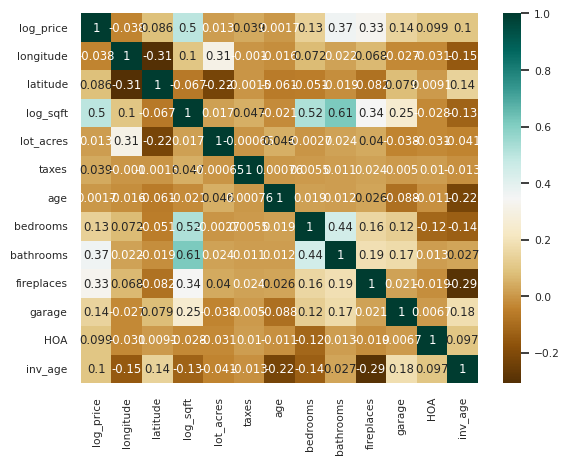

In [16]:
sns.set(font_scale=0.7)
sns.heatmap(c, cmap="BrBG", annot=True)

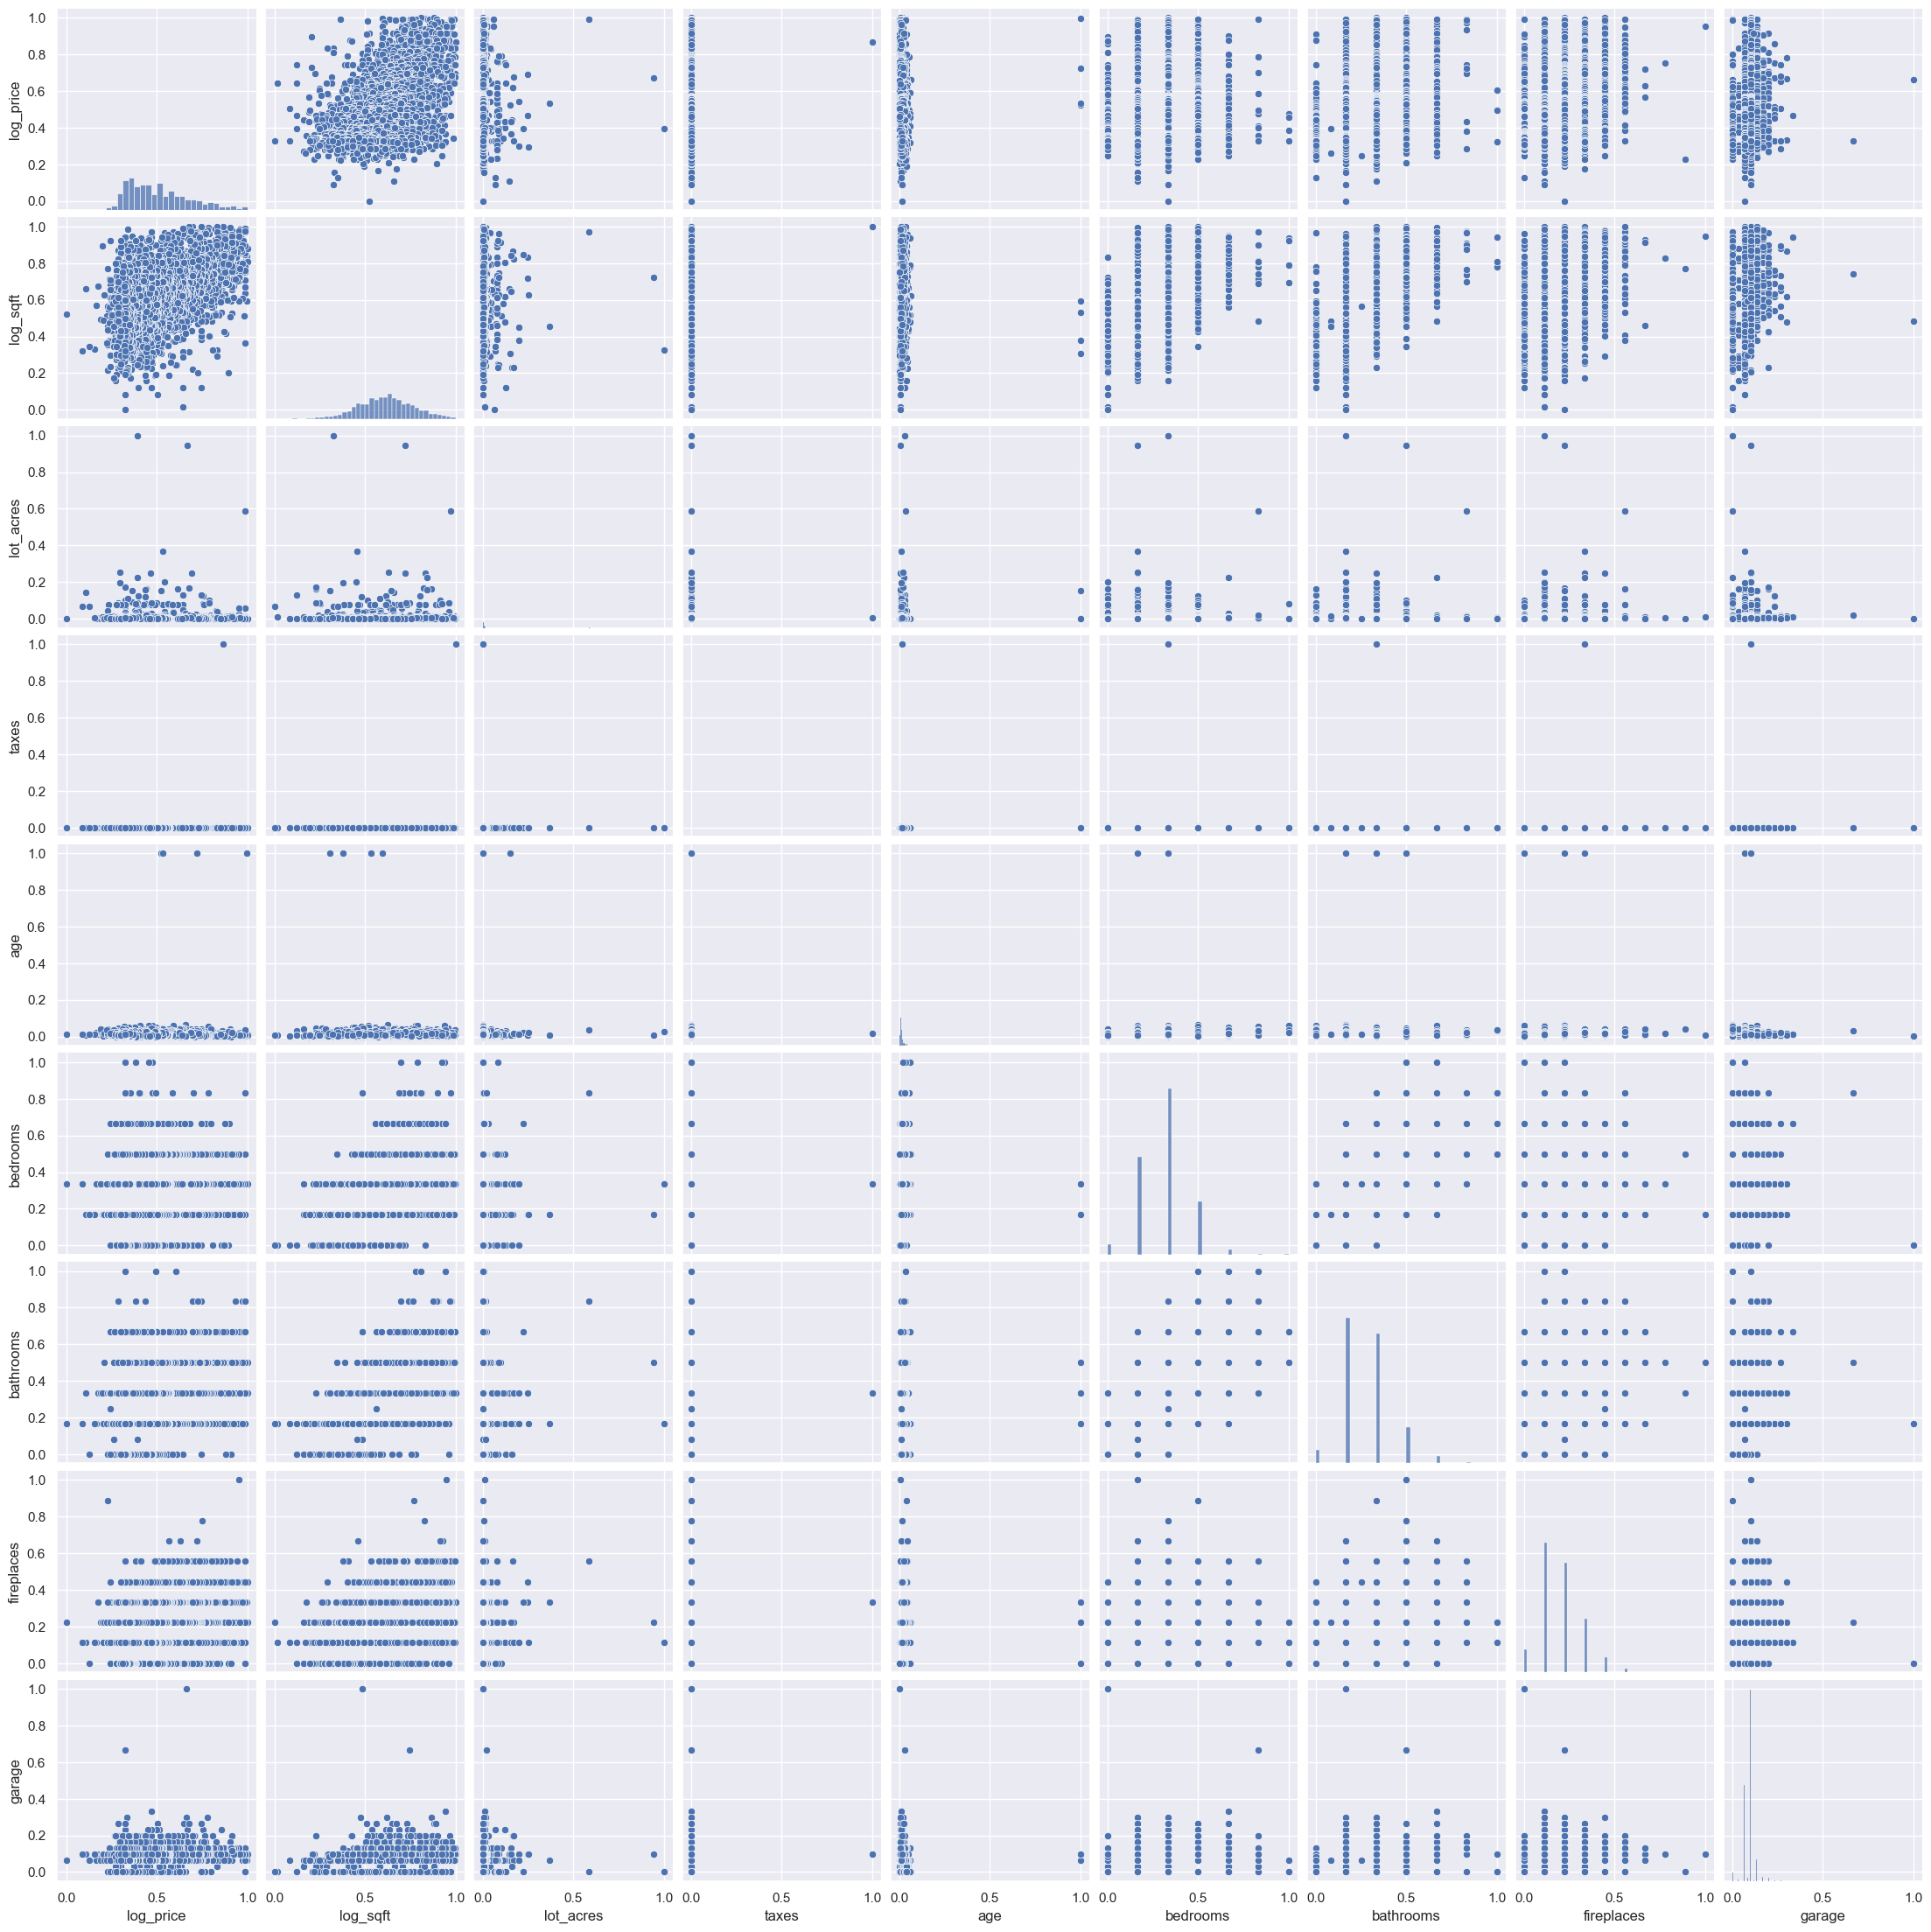

In [ ]:
sns.set(font_scale=1)
sns.pairplot(scaled_house_v[['log_price', 'log_sqft', 'lot_acres',
       'taxes', 'age', 'bedrooms', 'bathrooms', 'fireplaces', 'garage']])

In [17]:
def eval_metrics(y, y_hat):
    N = len(y)

    ols = (1/ (2*N)) * np.sum((y-y_hat) ** 2)

    r_squared = 1 - (np.sum((y - y_hat) ** 2) /np.sum((y - np.mean(y)) ** 2))

    mape = np.mean(np.abs((y-y_hat) / y)) * 100

    return {
        "OLS": round(float(ols), 4),
        "R-squared": round(float(r_squared), 4),
        "MAPE": round(float(mape), 4)
    }

In [18]:
scaled_house_train.columns

Index(['house_bin', 'log_price', 'longitude', 'latitude', 'log_sqft',
       'lot_acres', 'taxes', 'age', 'inv_age', 'bedrooms', 'bathrooms',
       'fireplaces', 'garage', 'HOA', 'oven_elect', 'oven_gas', 'oven_double',
       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
       'reverse_osmosis', 'lazy_susan', 'indoor_grill', 'wet_bar',
       'warming_drawer', 'desk', 'compactor', 'prep_sink', 'double_sink',
       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
       'freezer', 'dishwasher', 'tile', 'mex_tile', 'italian_tile', 'stone',
       'other', 'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble',
       'concrete', 'brick', 'cork', 'wood'],
      dtype='object')

In [19]:
X_train = scaled_house_train.to_numpy()
yc_train = X_train[:,0].astype(int)
y_train = X_train[:,1]
X_train_slr = X_train[:,4:12]
X_train = X_train[:,2:]

X_test = scaled_house_test.to_numpy()
yc_test = X_test[:,0].astype(int)
y_test = X_test[:,1]
X_test_slr = X_test[:,4:12]
X_test = X_test[:,2:]

In [20]:
class FastSLR():
    def fit(self, X, y):
        self.W = np.linalg.solve(X.T@X, X.T@y)
    def predict(self, X):
        return np.matmul(X, self.W)

In [21]:
slr = FastSLR()
slr.fit(X_train_slr, y_train)

In [22]:
y_hat = slr.predict(X_test_slr)

In [23]:
def r_squared(y_true, y_pred):
    """Calculates R-squared (coefficient of determination)."""

    y_mean = sum(y_true) / len(y_true)

    ss_tot = sum((y - y_mean) ** 2 for y in y_true)
    ss_res = sum((y - y_pred) ** 2 for y, y_pred in zip(y_true, y_pred))

    return 1 - (ss_res / ss_tot)

In [24]:
eval_metrics(yc_test, y_hat)

{'OLS': 0.7274, 'R-squared': -3.6875, 'MAPE': 62.245}

In [25]:
scaled_house_train.columns

Index(['house_bin', 'log_price', 'longitude', 'latitude', 'log_sqft',
       'lot_acres', 'taxes', 'age', 'inv_age', 'bedrooms', 'bathrooms',
       'fireplaces', 'garage', 'HOA', 'oven_elect', 'oven_gas', 'oven_double',
       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
       'reverse_osmosis', 'lazy_susan', 'indoor_grill', 'wet_bar',
       'warming_drawer', 'desk', 'compactor', 'prep_sink', 'double_sink',
       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
       'freezer', 'dishwasher', 'tile', 'mex_tile', 'italian_tile', 'stone',
       'other', 'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble',
       'concrete', 'brick', 'cork', 'wood'],
      dtype='object')

In [26]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [27]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [76]:
scaled_house_train2 = scaled_house_train[['house_bin', 'log_price', 'longitude', 'latitude', 'log_sqft',
       'bedrooms', 'bathrooms', 'fireplaces', 'inv_age', 'HOA',
       'garage',

#                                          'oven_elect', 'oven_gas', 'oven_double',
#       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
#        'indoor_grill', 'wet_bar',
#       'warming_drawer', 'prep_sink', 'double_sink',
#       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
#       'freezer', 'dishwasher', 'tile', 'mex_tile', 'italian_tile', 'stone',
#       'other', 'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble',
#       'concrete', 'brick', 'cork', 'wood'
                                         ]]

scaled_house_test2 = scaled_house_test[['house_bin', 'log_price', 'longitude', 'latitude', 'log_sqft',
       'bedrooms', 'bathrooms', 'fireplaces', 'inv_age', 'HOA',
       'garage',
#                                        'oven_elect', 'oven_gas', 'oven_double',
#       'oven_built_in', 'mw_double', 'mw_built_in', 'water_purifier',
#        'indoor_grill', 'wet_bar',
#       'warming_drawer', 'prep_sink', 'double_sink',
#       'island', 'microwave', 'garbage_disposal', 'oven', 'refrigerator',
#       'freezer', 'dishwasher', 'tile', 'mex_tile', 'italian_tile', 'stone',
#       'other', 'carpet', 'ceramic_tile', 'porcelain', 'vinyl', 'marble',
#       'concrete', 'brick', 'cork', 'wood'
                                       ]]

In [77]:
X_train2 = scaled_house_train2.to_numpy()
yc_train2 = X_train2[:,0].astype(int)
y_train2 = X_train2[:,1]
X_train2 = X_train2[:,4:]

X_test2 = scaled_house_test2.to_numpy()
yc_test2 = X_test2[:,0].astype(int)
y_test2 = X_test2[:,1]
X_test2 = X_test2[:,4:]

In [78]:
knn_loc = KNNClassifier()
knn_loc.fit(X_train2.astype(int),yc_train2)

In [79]:
y_hat1 = knn_loc.predict(X_test2.astype(int), 17)

In [80]:
print(accuracy(yc_test2, y_hat1))

0.46509129967776586


In [81]:
class KNNRegressor():

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3): # epsilon is a hyper parameter, we can tune it!
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt]) / (np.exp(-dist2[idxt]).sum() + epsilon)
            y_hat[i] = gamma_k.dot(self.y[idxt])

        return y_hat

In [82]:
knnr = KNNRegressor()


In [83]:
knnr.fit(X_train2, y_train2)

In [97]:
# played with various values of k all gave R2 of about 0.33
y_hat2 = knnr.predict(X_test2, 37)
print(eval_metrics(y_test2, y_hat2))

{'OLS': 0.0101, 'R-squared': 0.3484, 'MAPE': 23.405}


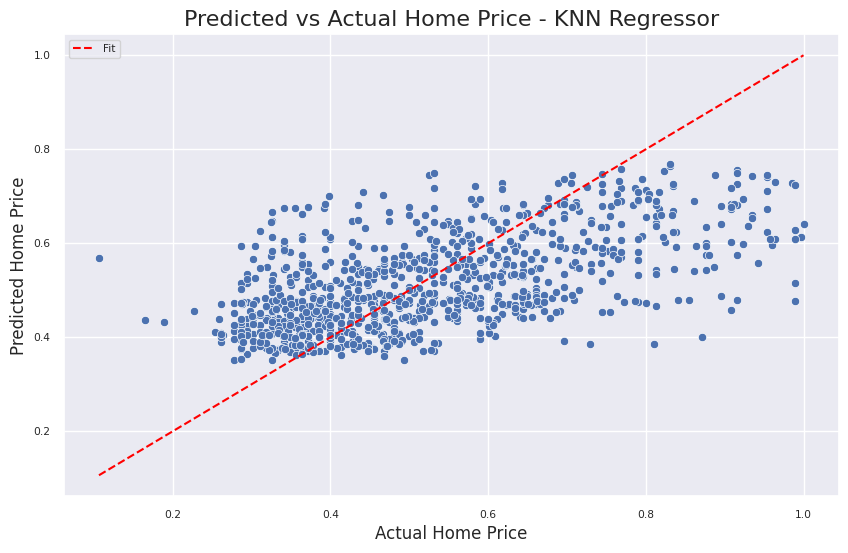

In [98]:
# Predicted vs Actual Rental Prices - Simple Linear Regressor
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test2, y=y_hat2)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', linestyle='--', label='Fit')
plt.title('Predicted vs Actual Home Price - KNN Regressor', fontsize=16)
plt.xlabel('Actual Home Price', fontsize=12)
plt.ylabel('Predicted Home Price', fontsize=12)
plt.legend()
plt.show()

In [99]:
scaled_house_trial = scaled_house_test2.sample(n=5)

X_test3 = scaled_house_trial.to_numpy()
y_test3 = X_test3[:,1]
X_test3 = X_test3[:,4:]

scaled_house_trial

,house_bin,log_price,longitude,latitude,log_sqft,bedrooms,bathrooms,fireplaces,inv_age,HOA,garage
2282,2.0,0.392690,0.478480,0.293599,0.331041,0.166667,0.000000,0.222222,0.055556,0.017881,0.066667
990,2.0,0.643460,0.535285,0.268678,0.667723,0.333333,0.333333,0.111111,0.022727,0.021481,0.066667
608,2.0,0.670700,0.476412,0.309787,0.561162,0.000000,0.166667,0.222222,0.055556,0.017881,0.066667
1721,1.0,0.518573,0.478281,0.297407,0.638819,0.333333,0.500000,0.000000,0.090909,0.007200,0.100000
3439,1.0,0.333490,0.502315,0.267938,0.540424,0.333333,0.166667,0.222222,0.025000,0.007440,0.066667


In [104]:
# played with various values of k all gave R2 of about 0.33
y_hat4 = knnr.predict(X_test3, 37)
print(eval_metrics(y_test3, y_hat4))

{'OLS': 0.0073, 'R-squared': 0.1761, 'MAPE': 18.3402}


In [105]:
y_hat4

array([0.37176285, 0.48582101, 0.47440606, 0.54396363, 0.42589962])

In [106]:
print("actual log(price): " + scaled_house_trial.log_price.astype(str))
print("-"*50)
print("predicted log(price):")
print(y_hat4)
print("-"*50)
print("actual price:")
print(np.exp(scaled_house_trial.log_price))
print("-"*50)
print("predicted price:")
print(np.exp(y_hat4))

2282    actual log(price): 0.3926895650585171
990     actual log(price): 0.6434604295776502
608     actual log(price): 0.6707002790677188
1721    actual log(price): 0.5185730384706583
3439    actual log(price): 0.3334901174062088
Name: log_price, dtype: object
--------------------------------------------------
predicted log(price):
[0.37176285 0.48582101 0.47440606 0.54396363 0.42589962]
--------------------------------------------------
actual price:
2282    1.480959
990     1.903055
608     1.955606
1721    1.679629
3439    1.395831
Name: log_price, dtype: float64
--------------------------------------------------
predicted price:
[1.450289   1.62550902 1.60705942 1.72282198 1.53096709]


In [107]:
def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [108]:
class MVLinearRegression():

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        Y = y

        # Begin Optimization
        self.W = np.random.randn(D)
        self.J = np.zeros(epochs)

        # Stochastic Gradient Descent
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            self.J[epoch] = OLS(Y, Y_hat, N)
            # Wheight Update Rule

            self.W -= eta * (1/N) * (X.T@(Y_hat - Y))

        if show_curve:
            plt.figure()
            plt.plot(self.J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Trainnig Curve")

    def predict(self, X):
        return X@self.W

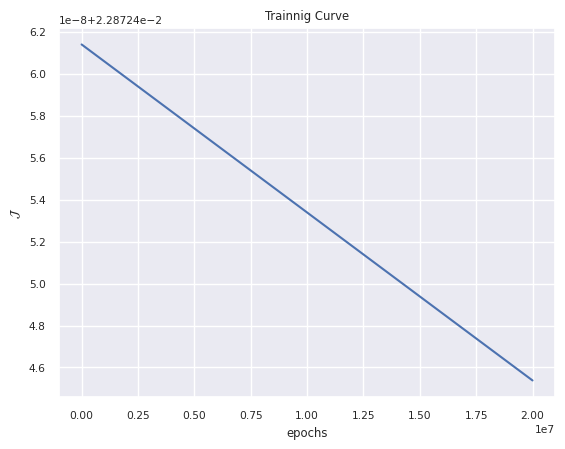

In [109]:
my_reg = MVLinearRegression()
my_reg.fit(X_train2, y_train2, eta=1e-13, epochs = 2e7, show_curve=True)

In [110]:
y_hat3 = my_reg.predict(X_test2)

In [111]:
eval_metrics(y_test2, y_hat3)

{'OLS': 0.0237, 'R-squared': -0.528, 'MAPE': 36.6968}

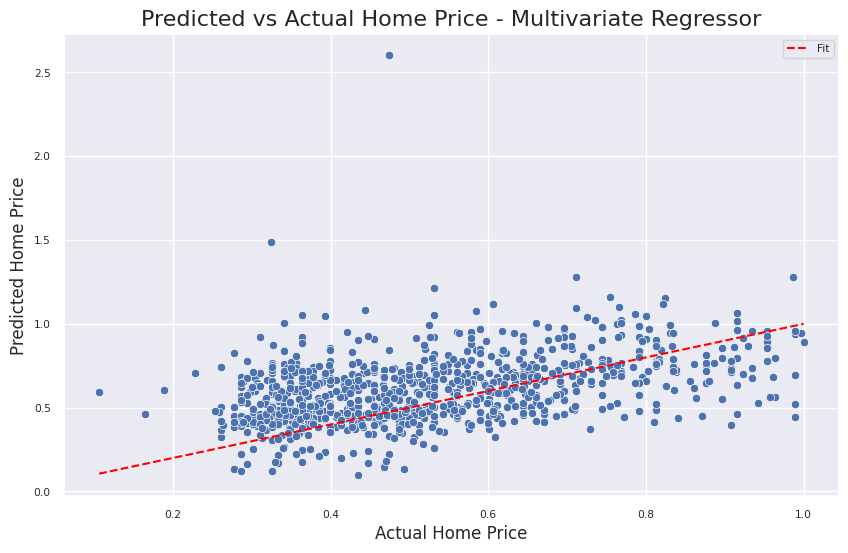

In [113]:
# Predicted vs Actual Rental Prices - Simple Linear Regressor
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test2, y=y_hat3)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', linestyle='--', label='Fit')
plt.title('Predicted vs Actual Home Price - Multivariate Regressor', fontsize=16)
plt.xlabel('Actual Home Price', fontsize=12)
plt.ylabel('Predicted Home Price', fontsize=12)
plt.legend()
plt.show()